# **CMPE-257**

**Homework Week 10 NLP Part 4; Fine-tune a LLM for your Poet**

---

**Part 4: Fine-tune a LLM for your Poet**

---

```
Rishikesh Andhare
Jack Kalavadia
Rutvik Moradiya
Pramatha Nadig
```



```
1. Pick one poet
2. Scrape 30-40 poems from this poet
3. convert the poems into one csv file
4. Use this notebook to fine tune a mistral 7b model with the 30-40 poems of that poet
5. save the model as <poet>_mistral7b.mod
6. query the model for new poetry
7. your model will generate new poetry in the style of the origianl poet
8. save the output for 5 poems you generate
9. try [poem] and try [line] determine which one of these chunking options will generate more coherent language
10. assess the cosine similarity between the generated poems of this poem -- whatveer this lang model produces and the previous poems you scraped from this poet.
11. Human assessment of the resulting putcomes
```


In [10]:
poet1 = "John Keats"
# poet2 = "John Keats"
store_loc = "/content/drive/MyDrive/poets/"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Installing Packages

In [2]:
!pip3 install nltk
!pip3 install sentence-transformers
!pip3 install contractions
!pip3 install pandas
!pip install bertopic
!pip install --upgrade gensim
!pip install pyLDAvis
!pip install spacy
!pip install requests
!pip install beautifulsoup4
!pip install lxml
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 104.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.1/311.1 kB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 38.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=8208b4b3427687993226435c9079b72283277b74a0458e3ebaecebe3d9393bce
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 7.0 M

#Importing libraries

In [1]:
import requests
import pandas as pd
import bs4 as bs
import urllib.request
import json
import contractions
import re
import nltk
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer, util
from nltk.corpus import stopwords
from transformers import pipeline
from spacy import displacy
from bertopic import BERTopic
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import pyLDAvis
import gensim
import spacy
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis.gensim as gensimvis
from gensim.utils import simple_preprocess

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/google/rpc/__init__.py:20: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.rpc')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  pkg_resources.declare_namespace(__name__)
/usr/local/lib/python3.10/dist-packages/pkg_resources/__init__.py:2349: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(parent)


In [2]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# !pip install t5

In [3]:
import warnings
warnings.filterwarnings('ignore', 'Calling')
warnings.filterwarnings('ignore', 'For a faster implementation')
warnings.filterwarnings('ignore', 'In')
warnings.filterwarnings('ignore', 'SelectableGroups dict interface')
warnings.filterwarnings('ignore', '`np')
warnings.filterwarnings('ignore', 'SelectableGroups')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('wordnet')
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Scrape 30 poems of 2 Poets from allpoetry.com

In [5]:
def clean_txt(text):
    text=text.replace(u'\xa0', u' ').replace(r'\r',u'\n').replace(r'\n', ' ').replace('\n', ' ').replace('\t', ' ')
    text = contractions.fix(text)
    text = text.strip().lower()
    text = re.sub(r"'", ' ', text)
    filters='!"\'#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
    translate_dict = dict((i, " ") for i in filters)
    translate_map = str.maketrans(translate_dict)
    text = text.translate(translate_map)
    text = ' '.join([w for w in text.split() if len(w)>1])
    text = re.sub(' +', ' ', text)
    text = ''.join(text)
    return text

def scrapePoemFromURL(poem_url_list):
    poems_results=[]
    for url in poem_url_list:
        header = {'User-Agent':'Mozilla/5.0'}
        requests = urllib.request.Request(url,headers=header)
        requestread = urllib.request.urlopen(requests).read()
        soup = bs.BeautifulSoup(requestread,'html.parser')
        poem_for_human = soup.find_all('div', class_="poem_body")[0].text.replace("© by owner. provided at no charge for educational purposes", "")
        poem_for_machine = (clean_txt(poem_for_human))
        poem_title = soup.find_all('h1')[0].text
        poems_results.append([poem_title, poem_for_machine, poem_for_human])
    return poems_results

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
def get_poem_url_json(poet):
    site = "https://allpoetry.com"
    search = "https://allpoetry.com/items/read_by/"
    page = 1
    URL_list = list()
    print("site")
    while len(URL_list) < 30:
        url = search + poet + "?page=" + str(page)

        response = requests.get(url)
        soup = bs.BeautifulSoup(response.text, 'lxml')
        poem_list = soup.find_all('a', href=True, class_='nocolor fn')
        for i in range(len(poem_list)):
            #print(poem_list[i]['href'])
            URL_list.append(site + poem_list[i]['href'])
            if len(URL_list) == 30:
                break
        page += 1
    return {"poet":poet, "URL":URL_list}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
pd_title_list = ["Title", "Poem", "Poem_for_Human"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
def getPoem(file_name, URLs):
    df = pd.DataFrame()
    if os.path.exists(file_name):
        df = pd.read_csv(file_name)
    else:
        os.makedirs(os.path.dirname(file_name), exist_ok=True)
        df = pd.DataFrame(scrapePoemFromURL(URLs), columns=pd_title_list)
        df.to_csv(file_name)
    return df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


If the poem file exist, avoid re-scrape it. Else, scrape it.

In [11]:
file_name = store_loc + poet1.replace(" ", "_") + ".csv"
WS_df = getPoem(file_name, get_poem_url_json(poet1)['URL'])

file_name = store_loc + poet2.replace(" ", "_") + ".csv"
JWG_df = getPoem(file_name, get_poem_url_json(poet2)['URL'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


site
site


In [12]:
WS_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Title,Poem,Poem_for_Human
0,0,Sonnet: When I Have Fears That I May Cease To Be,when have fears that may cease to be before my...,When I have fears that I may cease to be\n ...
1,1,Ode To Autumn,season of mists and mellow fruitfulness close ...,"1.\nSeason of mists and mellow fruitfulness, \..."
2,2,Ode To A Nightingale,my heart aches and drowsy numbness pains my se...,"My heart aches, and a drowsy numbness pains\n ..."
3,3,A Song About Myself,there was naughty boy naughty boy was he he wo...,"I.\nThere was a naughty boy,\n A naughty boy ..."
4,4,Ode On A Grecian Urn,thou still unravish bride of quietness thou fo...,"1.\nThou still unravish'd bride of quietness, ..."
5,5,Meg Merrilies,old meg she was gipsy and liv upon the moors h...,Old Meg she was a gipsy;\r\n And liv'd up...
6,6,Sonnet XV. On The Grasshopper And Cricket,the poetry of earth is never dead when all the...,The poetry of earth is never dead:\nWhen all t...
7,7,Lamia. Part I,upon time before the faery broods drove nymph ...,"Upon a time, before the faery broods \nDrove N..."
8,8,La Belle Dame Sans Merci,ah what can ail thee wretched wight alone and ...,"I.\nAh, what can ail thee, wretched wight,\n ..."
9,9,Sonnet. Written On A Blank Page In Shakespeare...,bright star would were stedfast as thou art no...,"Bright star, would I were stedfast as thou art..."


In [14]:
import pandas as pd

# Read CSV file into a pandas DataFrame
csv_file_path = '/content/drive/MyDrive/poets/John_Keats.csv'  # Replace with the path to your CSV file
df = pd.read_csv(csv_file_path)

# Convert DataFrame to JSON
json_data = df.to_dict(orient='records')

# Print or save the JSON data
print(json_data)
# If you want to save it to a file
with open('output.json', 'w') as json_file:
    json.dump(json_data, json_file, indent=2)


[{'Unnamed: 0': 0, 'Title': 'Sonnet: When I Have Fears That I May Cease To Be', 'Poem': 'when have fears that may cease to be before my pen has glean my teeming brain before high piled books in charactry hold like rich garners the full ripen grain when behold upon the night starr face huge cloudy symbols of high romance and think that may never live to trace their shadows with the magic hand of chance and when feel fair creature of an hour that shall never look upon thee more never have relish in the faery power of unreflecting love then on the shore of the wide world stand alone and think till love and fame to nothingness do sink', 'Poem_for_Human': "When I have fears that I may cease to be\n\xa0 \xa0 \xa0  Before my pen has glean'd my teeming brain, \n\xa0 \xa0  Before high piled books, in charactry,\n\xa0 Hold like rich garners the full-ripen'd grain; \nWhen I behold, upon the night's starr'd face,\n\xa0 Huge cloudy symbols of a high romance, \nAnd think that I may never live to tra

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
import json
import random

def read_json(output_filename):
    """Read data from a .json file."""
    with open(output_filename, 'r') as file:
        data = json.load(file)
    return data

def segment_and_format_text(json_data):
    """Modify based on the structure of your 'output.json'."""
    # Assuming your existing JSON structure has a specific format
    # Modify this function based on the structure of your 'output.json'
    # The example assumes that 'output.json' is a list of dictionaries
    return json_data

def save_as_jsonl(data, output_filename):
    """Save the provided data as a .jsonl file."""
    with open(output_filename, 'w') as file:
        for entry in data:
            file.write(json.dumps(entry) + '\n')

if __name__ == "__main__":
    # Read data from the existing JSON file
    output_json_path = "output.json"  # Replace with the path to your existing JSON file
    json_data = read_json(output_json_path)

    # Segment and format the data (modify based on your JSON structure)
    jsonl_data = segment_and_format_text(json_data)

    # Shuffle and split the data into training and validation sets (80/20 split)
    random.shuffle(jsonl_data)
    split_index = int(0.8 * len(jsonl_data))
    train_data, val_data = jsonl_data[:split_index], jsonl_data[split_index:]

    # Save as .jsonl
    save_as_jsonl(train_data, "train.jsonl")
    save_as_jsonl(val_data, "val.jsonl")
    print("Data saved to train.jsonl and val.jsonl")


Data saved to train.jsonl and val.jsonl


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# You only need to run this once per machine
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q -U datasets scipy ipywidgets matplotlib

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 18.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 98.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
# from datasets import load_dataset
# dataset = load_dataset("json", data_files="my_file.json")

In [24]:
from datasets import load_dataset

train_dataset = load_dataset('json', data_files='/content/train.jsonl')
eval_dataset = load_dataset('json', data_files='/content/val.jsonl')

In [25]:
train_dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'Title', 'Poem', 'Poem_for_Human'],
        num_rows: 24
    })
})

In [26]:
eval_dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'Title', 'Poem', 'Poem_for_Human'],
        num_rows: 6
    })
})

In [34]:
eval_poems = eval_dataset['train']['Poem']

Change this next line

In [12]:
def formatting_func(json_poem):
    poet_name = "John Keats"
    poem_lines = json_poem['Poem'].split('\u00a0 \u00a0 \u00a0  ')
    formatted_lines = [f"### The following is a line from the poem by the poet '{poet_name}': {line}" for line in poem_lines]
    formatted_text = '\n'.join(formatted_lines)
    return formatted_text


# Load the base model

In [4]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(base_model_id, quantization_config=bnb_config)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

# Tokenization

In [13]:
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_side="left",
    add_eos_token=True,
    add_bos_token=True,
)
tokenizer.pad_token = tokenizer.eos_token
print(tokenizer)
def generate_and_tokenize_prompt(prompt):
    return tokenizer(formatting_func(prompt))

LlamaTokenizerFast(name_or_path='mistralai/Mistral-7B-v0.1', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'pad_token': '</s>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}


In [14]:
tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt)
tokenized_val_dataset = eval_dataset.map(generate_and_tokenize_prompt)

Map:   0%|          | 0/24 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

In [16]:
tokenized_train_dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'Title', 'Poem', 'Poem_for_Human', 'input_ids', 'attention_mask'],
        num_rows: 24
    })
})

In [17]:
tokenized_val_dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'Title', 'Poem', 'Poem_for_Human', 'input_ids', 'attention_mask'],
        num_rows: 6
    })
})

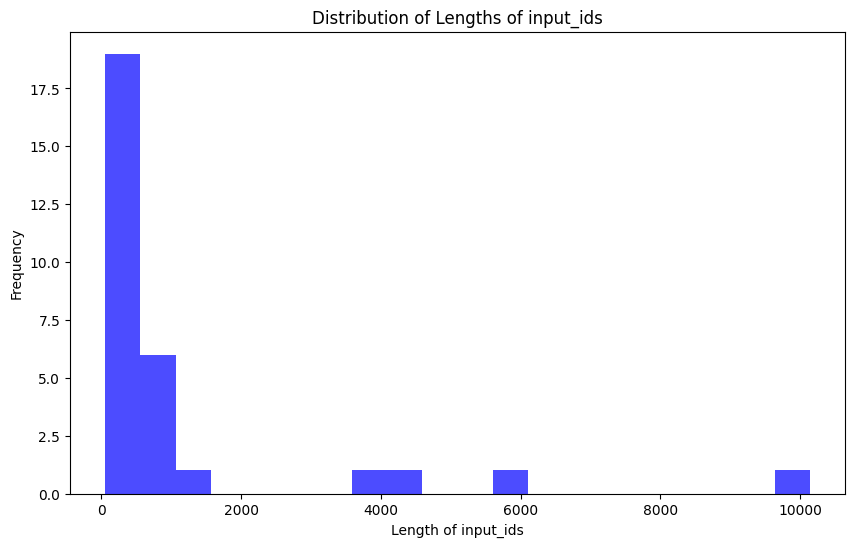

In [20]:
import matplotlib.pyplot as plt

def plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset):
    lengths_train = [len(x['input_ids']) for x in tokenized_train_dataset['train']]
    lengths_val = [len(x['input_ids']) for x in tokenized_val_dataset['train']]

    # Combine the lengths of training and validation datasets
    lengths = lengths_train + lengths_val

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=20, alpha=0.7, color='blue')
    plt.xlabel('Length of input_ids')
    plt.ylabel('Frequency')
    plt.title('Distribution of Lengths of input_ids')
    plt.show()

# Assuming you have tokenized_train_dataset and tokenized_val_dataset available
plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)


In [21]:
max_length = 636 # This was an appropriate max length for my dataset

def generate_and_tokenize_prompt2(prompt):
    result = tokenizer(
        formatting_func(prompt),
        truncation=True,
        max_length=max_length,
        padding="max_length",
    )
    result["labels"] = result["input_ids"].copy()
    return result

In [22]:
tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt2)
tokenized_val_dataset = eval_dataset.map(generate_and_tokenize_prompt2)

Map:   0%|          | 0/24 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

In [25]:
# Replace 'your_dataset_key' with the actual key used in your dataset
example_index = 1
# tokenized_train_dataset['train'][example_index]['input_ids']
print(tokenized_train_dataset['train'][example_index]['input_ids'])


[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 774, 415, 2296, 349, 264, 1407, 477, 272, 16067, 486, 272, 8796, 464, 14964, 4702, 1449, 1869, 6833, 4580, 682, 654, 341, 286, 6985, 390, 28112, 1524, 459, 297, 305, 538, 8154, 416, 423, 7342, 389, 24485, 272, 2125, 391, 6265, 395, 25391, 305, 2298, 7413, 737, 4735, 7749, 7767, 28706, 19898, 1234, 366, 570, 272, 5272, 15507, 438, 652, 16032, 737, 3638, 1009, 7972, 534, 28714, 17841, 3713, 6340, 2930, 480, 3626, 442, 14961, 288, 356, 272, 633, 2664, 12962, 5934, 1009, 7899, 3714, 272, 13691, 304, 272, 3418, 734, 708, 2783, 1309, 341, 286, 6985, 1309, 521, 4078, 522, 25896, 3714, 586, 4968, 2016, 3191, 2748, 288, 13886, 298, 1601, 354, 2270, 871, 2664, 2949, 304, 1719, 479, 20875, 354, 2270, 297, 7221, 521, 3290, 1309, 1309, 298, 3934, 559, 20602, 3214, 5276, 304, 579, 2943, 2270, 442, 1112, 20153, 266, 298, 3168, 18263, 295, 1322, 266, 7806, 369, 1024, 

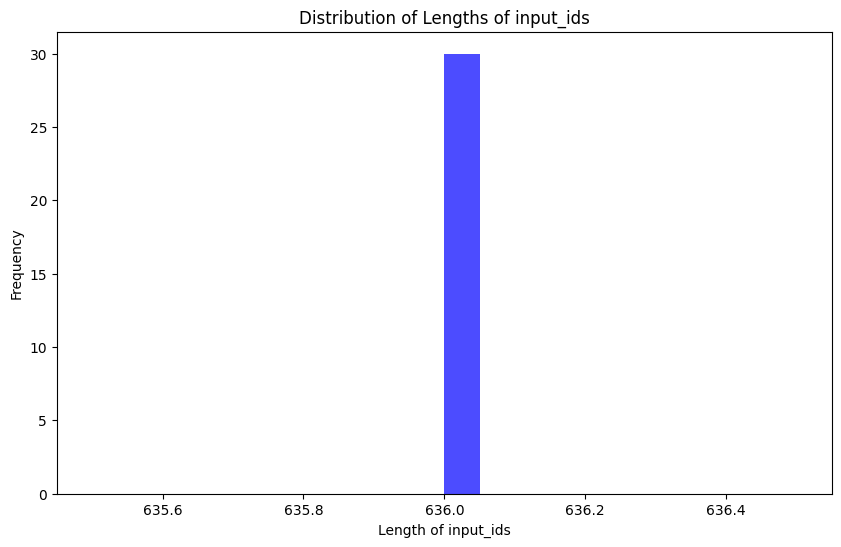

In [26]:
plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)

# How does the base model do?

In [29]:
eval_prompt = " The following is a Poem by John Keats the Poet: # "

In [30]:
# Re-init the tokenizer so it doesn't add padding or eos token
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    add_bos_token=True,
)

model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

model.eval()
with torch.no_grad():
    print(tokenizer.decode(model.generate(**model_input, max_new_tokens=256, repetition_penalty=1.15)[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 The following is a Poem by John Keats the Poet: # 1

# To Autumn

Season of mists and mellow fruitfulness,
Close bosom-friend of the maturing sun;
Conspiring with him how to load and bless
With fruit the vines that round the thatch-eves run;
To bend with apples the moss’d cottage-trees,
And fill all fruit with ripeness to the core;
To swell the gourd, and plump the hazel shells
With a sweet kernel; to set budding more,
And still more, later flowers for the bees,
Until they think warm days will never cease,
For Summer has o’erbrimm’d their clammy cells.

Who hath not seen thee, now thou art fully ripe?
Thy yellow leaves, gleaned fodder for the owlet,
Thy bunches of acorns rattling their shells
Beneath the lopped hornbeams; and thy heavy sheaves
Of grain, whose broad blades make rustling as they fall?
Oh, Bard! thou wilt forget me, if I seek
To tell thy


Observe how the model does out of the box.

# Set up LORA

In [31]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

In [32]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

In [33]:
print(model)

MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): MistralRotaryEmbedding()
        )
        (mlp): MistralMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm()
        (post_attention_layernorm): MistralRMSNorm()
      )
    )
   

In [34]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=32,
    lora_alpha=64,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
    bias="none",
    lora_dropout=0.05,  # Conventional
    task_type="CAUSAL_LM",
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

trainable params: 85041152 || all params: 3837112320 || trainable%: 2.2162799758751914


See how the model looks different now, with the LoRA adapters added:

In [35]:
print(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MistralForCausalLM(
      (model): MistralModel(
        (embed_tokens): Embedding(32000, 4096)
        (layers): ModuleList(
          (0-31): 32 x MistralDecoderLayer(
            (self_attn): MistralAttention(
              (q_proj): Linear4bit(
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=32, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=32, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
              )
              (k_proj): Linear4bit(
                (lora_dropout): ModuleDict(

# Model Training

In [36]:
if torch.cuda.device_count() > 1: # If more than 1 GPU
    model.is_parallelizable = True
    model.model_parallel = True

In [37]:
torch.cuda.device_count()

1

In [39]:
import transformers
from datetime import datetime

# Assuming tokenized_train_dataset and tokenized_val_dataset are DatasetDict objects
train_dataset = tokenized_train_dataset['train']
val_dataset = tokenized_val_dataset['train']

project = "journal-finetune"
base_model_name = "mistral"
run_name = base_model_name + "-" + project
output_dir = "./" + run_name

trainer = transformers.Trainer(
    model=model,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    args=transformers.TrainingArguments(
        output_dir=output_dir,
        warmup_steps=1,
        per_device_train_batch_size=2,
        gradient_accumulation_steps=1,
        max_steps=175,
        learning_rate=2.5e-5,
        optim="paged_adamw_8bit",
        logging_steps=25,
        logging_dir="./logs",
        save_strategy="steps",
        save_steps=25,
        evaluation_strategy="steps",
        eval_steps=25,
        do_eval=True,
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

model.config.use_cache = False
tokenizer.add_special_tokens({'pad_token': '[PAD]'})
trainer.train()


You're using a LlamaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss,Validation Loss
25,2.356800,2.114883
50,1.022900,2.219334
75,0.589600,2.364754
100,0.328400,2.495631
125,0.125100,2.772891
150,0.048500,2.904973
175,0.026800,2.952649


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.

TrainOutput(global_step=175, training_loss=0.6426031940323966, metrics={'train_runtime': 5264.1068, 'train_samples_per_second': 0.066, 'train_steps_per_second': 0.033, 'total_flos': 9610578586828800.0, 'train_loss': 0.6426031940323966, 'epoch': 14.58})

# Try the Trained Model!

In [42]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [43]:
!pip install git+https://github.com/huggingface/transformers

  Cloning https://github.com/huggingface/transformers to /tmp/pip-req-build-qdochd_m
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers /tmp/pip-req-build-qdochd_m
  Resolved https://github.com/huggingface/transformers to commit 2ac5b9325ed3b54950c6c61fd5838ac6e55a9fe1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [44]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|
    
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


get a huggingface key

respond no to github validation

In [2]:
!zip -r mistral_checkpoints.zip mistral-journal-finetune

  adding: mistral-journal-finetune/ (stored 0%)
  adding: mistral-journal-finetune/checkpoint-175/ (stored 0%)
  adding: mistral-journal-finetune/checkpoint-175/rng_state.pth (deflated 25%)
  adding: mistral-journal-finetune/checkpoint-175/README.md (deflated 64%)
  adding: mistral-journal-finetune/checkpoint-175/training_args.bin (deflated 51%)
  adding: mistral-journal-finetune/checkpoint-175/trainer_state.json (deflated 76%)
  adding: mistral-journal-finetune/checkpoint-175/adapter_model.safetensors (deflated 8%)
  adding: mistral-journal-finetune/checkpoint-175/optimizer.pt (deflated 17%)
  adding: mistral-journal-finetune/checkpoint-175/adapter_config.json (deflated 50%)
  adding: mistral-journal-finetune/checkpoint-175/scheduler.pt (deflated 56%)
  adding: mistral-journal-finetune/checkpoint-125/ (stored 0%)
  adding: mistral-journal-finetune/checkpoint-125/rng_state.pth (deflated 25%)
  adding: mistral-journal-finetune/checkpoint-125/README.md (deflated 64%)
  adding: mistral-jo

In [3]:
!ls -sh

total 3.0G
4.0K drive  3.0G mistral_checkpoints.zip   308K output.json  256K train.jsonl
4.0K logs   4.0K mistral-journal-finetune  4.0K sample_data   56K val.jsonl


In [46]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [5]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "mistralai/Mistral-7B-v0.1"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,  # Mistral, same as before
    quantization_config=bnb_config,  # Same quantization config as before
    device_map="auto",
    trust_remote_code=True,
    use_auth_token=True
)

tokenizer = AutoTokenizer.from_pretrained(base_model_id, add_bos_token=True, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/transformers/models/auto/auto_factory.py:472: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [6]:
from peft import PeftModel

ft_model = PeftModel.from_pretrained(base_model, "mistral-journal-finetune/checkpoint-175")

### Model Inferences

In [12]:
eval_prompt = " The following is a Poem by John Keats the Poet, who is one of the best selling poets in America: # "
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    poem1 = tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=200, repetition_penalty=1.15)[0], skip_special_tokens=True)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [13]:
eval_prompt = " The following is a Poem by John Keats the Poet, who writes the story of the kings falling in love with a handmaiden : # "
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    poem2 = tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=200, repetition_penalty=1.15)[0], skip_special_tokens=True)


Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [14]:
eval_prompt = " The following is a Poem by John Keats the Poet, who deteremines which cricket team will world cup  : # "
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    poem3 = tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=200, repetition_penalty=1.15)[0], skip_special_tokens=True)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [15]:
eval_prompt = " The following is a Poem by John Keats the Poet, who tells how world war 2 had affected the world  : # "
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    poem4 = tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=200, repetition_penalty=1.15)[0], skip_special_tokens=True)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [16]:
eval_prompt = " The following is a Poem by John Keats the Poet, who writes the poems on shakespeare  : # "
model_input = tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    poem5 = tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=200, repetition_penalty=1.15)[0], skip_special_tokens=True)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


In [17]:
print(poem1)

 The following is a Poem by John Keats the Poet, who is one of the best selling poets in America: # 100 poems that shaped the world.

When have fears that may cease to be before my pen has glean my teeming brain before high piled books in charactry hold like rich garners the full ripen grain when behold upon the night starr face huge cloudy symbols of high romance and think that may never live to trace their shadows with the magic hand of chance and when feel fair creature of an hour that shall never look upon thee more never have relish in the faery power of unreflecting love then on the shore of the wide world stand alone and think till love and fame to nothingness do sink


In [18]:
print(poem2)

 The following is a Poem by John Keats the Poet, who writes the story of the kings falling in love with a handmaiden : # 10 sonnet when have fears that may not think there any ill the soul hath her own forests where she feeds and is content to hear no news at all and in the midst of drought to find the hidden spring of pleasure fair and perennial voice she hath whose name was tranquillity she hath such sweet particular miseries she hath such tender pains and cares that were not for the world but for some single soul that mourns thus heavily its passion at her feet she will sit and sing and smile and dream and be silent when the passion is hushed into patience and patient thinking of the summer clouds and soft constant showers upon the summer flowers let me thy vigil keep and bring thee lily white stalks from the elves leisurely foot this will be happiness if it be granted thee and me never to seek the thing we seek but to sit together at the fire side as two kinsmen who have gloomily w

In [19]:
print(poem3)

 The following is a Poem by John Keats the Poet, who deteremines which cricket team will world cup  : # 03609251045

Ah what can ail thee wretched wight alone and palely loitering the sedge has withered from the lake and no birds sing oh what can ail thee wretched wight so haggard and so woe begone the squirrel granary is full and the harvest done see lily on thy brow with anguish moist and fever dew and on thy cheek fading rose fast withereth too met lady in the meads full beautiful faery child her hair was long her foot was light and her eyes were wild made garland for her head and bracelets too and fragrant zone she looked at me as she did love and made sweet moan set her on my pacing steed and nothing else saw all day long for sidelong would she bend and sing faery song she found me roots of relish sweet and honey wild and manna dew


In [20]:
print(poem4)

 The following is a Poem by John Keats the Poet, who tells how world war 2 had affected the world  : #  when have fears that may cease to be before my pen has glean my teeming brain before high piled books in charactry hold like rich garners the full ripen grain when behold upon the night starr face huge cloudy symbols of high romance and think that may never live to trace their shadows with the magic hand of chance and when feel fair creature of an hour that shall never look upon thee more never have relish in the faery power of unreflecting love then on the shore of the wide world stand alone and think till love and fame to nothingness do sink


In [21]:
print(poem5)

 The following is a Poem by John Keats the Poet, who writes the poems on shakespeare  : # 10 sonnet when have fears that may not think do not see what thou art but thy white face shines through the mask thou mayst know by this dim looking-glasspale should be hidden love in thy chest from miseries thyself should not be thy foe should stay with thee in dark time the casques gories and trappings of vain glory none of these things could make unworthy love more dear to thee than that which knows no idol but itself no temple but thy breast no altar but thy heart on such love surpasses all my powr that can perceive how very wonderful it is and live to tell—when have fears that may not think do not see what thou art but thy white face shakes thy self from out the mask tremble lest the paleness that men mouths stamp upon thy lips should be the kiss that fades and dies on them—when have fears that may not think do not see what thou art but


Note: save the putput from each prompt so we can evaluate the corenece of the generated language

assess the cosine similarity between the generated poems of this poem -- whatveer this lang model produces and the previous poems you scraped from this poet.

In [35]:
eval_poems = eval_dataset['train']['Poem']
len(eval_poems)

6

In [36]:
poems = eval_poems + [poem1, poem2, poem3, poem4, poem5]
len(poems)

11

In [41]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [40]:
vectorizer = CountVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(poems)
dense_vectors = vectors.todense()
df = pd.DataFrame(dense_vectors,
                  columns=vectorizer.get_feature_names_out(),
                  index = [f"eval_poem{i+1}" for i in range(len(eval_poems))] + [f"gen_poem{i+1}" for i in range(5)])
df.head()

,03609251045,10,100,11,14,14th,1818,1819,1848,1895,...,years,yes,yielded,young,youth,youthful,zenith,zephyrs,zest,zone
eval_poem1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
eval_poem2,0,0,0,1,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
eval_poem3,0,0,0,0,1,0,0,0,0,1,...,1,1,1,0,0,0,1,1,0,0
eval_poem4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
eval_poem5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [42]:
print(cosine_similarity(df, df))

[[1.         0.09152858 0.08241019 0.07300496 0.01402221 0.08756869
  0.05663411 0.03401024 0.05124884 0.05626028 0.03243285]
 [0.09152858 1.         0.09884119 0.06816977 0.0637597  0.16590799
  0.05267415 0.11598467 0.05825775 0.05232647 0.0497724 ]
 [0.08241019 0.09884119 1.         0.27661019 0.11329515 0.10254028
  0.15192581 0.12395517 0.144026   0.1545164  0.23242465]
 [0.07300496 0.06816977 0.27661019 1.         0.05312632 0.1361123
  0.08102684 0.10779254 0.09334989 0.08049201 0.30058134]
 [0.01402221 0.0637597  0.11329515 0.05312632 1.         0.05718863
  0.0242091  0.05997002 0.06024449 0.0240493  0.0457509 ]
 [0.08756869 0.16590799 0.10254028 0.1361123  0.05718863 1.
  0.06299408 0.11443443 0.02090148 0.06257827 0.05555556]
 [0.05663411 0.05267415 0.15192581 0.08102684 0.0242091  0.06299408
  1.         0.16514456 0.15484035 0.92717265 0.21837947]
 [0.03401024 0.11598467 0.12395517 0.10779254 0.05997002 0.11443443
  0.16514456 1.         0.17351779 0.17499146 0.22886885]
 

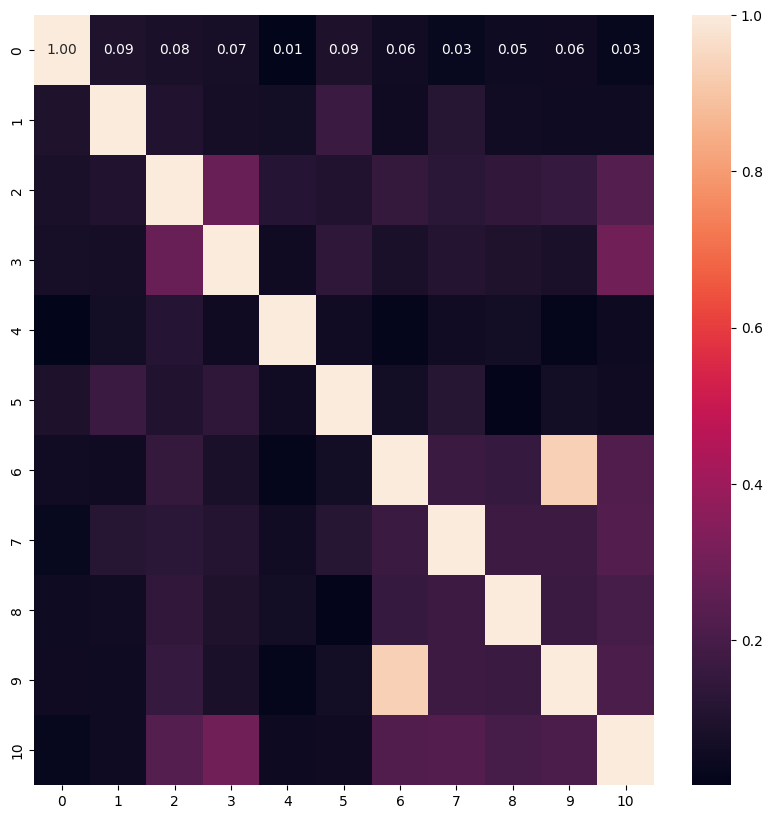

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(cosine_similarity(df, df), annot=True, fmt='.2f');